In [3]:
# import gdown
# from pyro.infer import SVI, JitTrace_ELBO, Trace_ELBO, TraceGraph_ELBO
# from pyro.optim import Adam
# import os
# import pyro
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import anndata as ad
import re
import pyro.distributions as pyrodist
import scanpy as sc
import seaborn as sns
from datetime import datetime
import time
import toolz
import torch
import torch.utils.data
import torchvision.utils as vutils
import umap
import skimage as skim
from abc import abstractmethod
from anndata.experimental.pytorch import AnnLoader
from importlib import reload
from math import pi, sin, cos, sqrt, log
import sklearn
from sklearn import datasets as skds
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import mixture
from toolz import partial, curry
from toolz import groupby, count, reduce, reduceby, countby, identity
from torch import nn, optim, distributions, Tensor
from torch.nn.functional import one_hot
from torchvision import datasets, transforms, models
from torchvision.utils import save_image, make_grid
from typing import Callable, Iterator, Union, Optional, TypeVar
from typing import List, Set, Dict, Tuple
from typing import Mapping, MutableMapping, Sequence, Iterable
from typing import Union, Any, cast, IO, TextIO
from torch.utils.data import WeightedRandomSampler
from scipy import stats
# my own sauce
from my_torch_utils import denorm, normalize, mixedGaussianCircular
from my_torch_utils import fclayer, init_weights, buildNetwork
from my_torch_utils import fnorm, replicate, logNorm, log_gaussian_prob
from my_torch_utils import plot_images, save_reconstructs, save_random_reconstructs
from my_torch_utils import scsimDataset
import my_torch_utils as ut
from importlib import reload
from torch.nn import functional as F
import gmmvae03 as M3
import gmmvae04 as M4
import gmmvae05 as M5
import gmmvae06 as M6
import gmmvae07 as M7
import gmmvae08 as M8
import gmmvae09 as M9
import gmmvae10 as M10
import gmmvae11 as M11
import gmmvae12 as M12
import gmmvae13 as M13
import gmmvae14 as M14
import gmmvae15 as M15
import gmmvae16 as M16
import gmmvaeBeta00 as Mb0
import gmmTraining as Train

print(torch.cuda.is_available())

#plt.ion()
#sc.settings.verbosity = 3
#sc.logging.print_header()
# sc.settings.set_figure_params(dpi=120, facecolor='white', )
# sc.settings.set_figure_params(figsize=(8,8), dpi=80, facecolor='white', )
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
)

True
True


In [4]:
enc = OneHotEncoder(sparse=False, dtype=np.float32)
enc_ct = LabelEncoder()


@curry
def binarize(x: torch.Tensor, threshold: float = 0.25) -> torch.Tensor:
    ret = (x > threshold).float()
    return ret


transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)
train_dataset = datasets.MNIST(
    "data/",
    train=True,
    download=True,
    transform=transform,
)
test_dataset = datasets.MNIST(
    "data/",
    train=False,
    download=True,
    transform=transform,
)
train_data = train_dataset.data.float() / 255
test_data = test_dataset.data.float() / 255
train_labels = F.one_hot(
    train_dataset.targets.long(),
    num_classes=10,
).float()
test_labels = F.one_hot(
    test_dataset.targets.long(),
    num_classes=10,
).float()

data_loader = torch.utils.data.DataLoader(
    dataset=ut.SynteticDataSetV2(
        dati=[
            train_data,
            train_labels,
        ],
    ),
    batch_size=128,
    shuffle=True,
)
test_loader = torch.utils.data.DataLoader(
    dataset=ut.SynteticDataSetV2(
        dati=[
            test_data,
            test_labels,
        ],
    ),
    batch_size=128,
    shuffle=True,
)

subset = ut.randomSubset(s=len(train_labels), r=0.1)
labeled_data_loader = torch.utils.data.DataLoader(
        dataset=ut.SynteticDataSet(
            data=train_data[subset],
            labels=train_labels[subset],
            ),
        batch_size=128,
        shuffle=True,
        )
unlabeled_data_loader = torch.utils.data.DataLoader(
        dataset=ut.SynteticDataSet(
            data=train_data[subset == False],
            labels=train_labels[subset == False],
            ),
        batch_size=128,
        shuffle=True,
        )

In [31]:
model = Mb0.VAE_Dirichlet_GMM_TypeB1602xz(
    nx=28 ** 2,
    #concentration=2e0,
    concentration=1e-0,
    nclasses=10,
    nh=1024,
    nhp=1024,
    nhq=1024,
    nz=8,
    nw=8,
    numhidden=2,
    numhiddenp=2,
    numhiddenq=2,
    dropout=0,
    bn=True,
    yscale=1e0,
    zscale=1e0,
    wscale=1e0,
    reclosstype="Bernoulli",
    # reclosstype="mse",
    relax=True,
    # use_resnet=True,
    restrict_w=True,
    restrict_z=True,

) 
model.apply(init_weights)
print(model.__class__)

<class 'gmmvaeBeta00.VAE_Dirichlet_GMM_TypeB1602xz'>


In [15]:
model.load_state_dict(
    torch.load("./results/model_d_xz_mnist101660830851.179349model_state.pt",)
)

<All keys matched successfully>

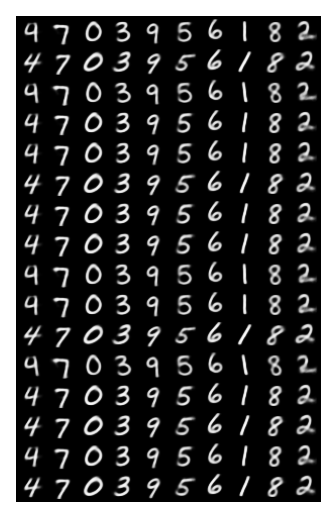

<Figure size 320x320 with 0 Axes>

In [16]:
ut.do_plot_helper(model, "cpu")

In [32]:
model.apply(init_weights)
print(model.__class__)

<class 'gmmvaeBeta00.VAE_Dirichlet_GMM_TypeB1602xz'>


epoch's lr =  0.001
epoch 0
training phase
rec: 594.9479370117188
loss_z: 19.70147705078125
loss_w: 4.164020538330078
loss_cluster: -0.2905963063240051
loss_d: 10.167510986328125
loss_y_alt: 1.7163065671920776
loss_y_alt2: 0
total_loss: 630.697265625
num_clusters: 3

[-1. -1.  7.  7.  8.  0.  1.  2.  0.  1.] 
 0.2053809523809524 
 [-1.         -1.          0.33333333  0.42857143  1.          0.25
  1.          0.42857143  0.33333333  0.28      ]
0.3492063492063492 

epoch's lr =  0.001
epoch 0
training phase
rec: 90.78958129882812
loss_z: 11.830366134643555
loss_w: 1.1323210000991821
loss_cluster: -0.9585027098655701
loss_d: 0.3331592082977295
loss_y_alt: 1.807748794555664
loss_y_alt2: 0
total_loss: 105.89318084716797
num_clusters: 10

[7. 8. 4. 5. 1. 3. 2. 5. 0. 6.] 
 0.8405474427533252 
 [0.70588235 0.92307692 0.66666667 0.91666667 1.         0.90909091
 1.         0.5        0.90909091 0.875     ]
0.8359375 

epoch's lr =  0.001
epoch 0
training phase
rec: 87.85391235351562
loss_z: 

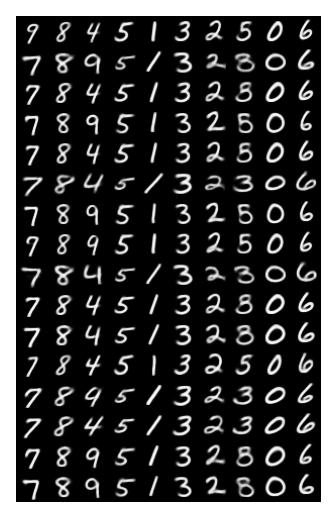

<Figure size 320x320 with 0 Axes>

In [33]:
Train.basicTrainLoop(
    model,
    data_loader,
    test_loader,
    num_epochs=10,
    lrs=[1e-3,1e-3,1e-3,1e-3,5e-4,1e-4,1e-5,1e-5],
    wt=1e-3,
    report_interval=35,
    #do_plot=True,
    test_accuracy=True,
)
ut.do_plot_helper(model, "cpu")

epoch's lr =  0.05
epoch 0
training phase
rec: 84.72433471679688
loss_z: 13.038248062133789
loss_w: 1.5188826322555542
loss_cluster: -0.9651897549629211
loss_d: 0.34931397438049316
loss_y_alt: 1.9365874528884888
loss_y_alt2: 0
total_loss: 101.5673599243164
num_clusters: 10

done training


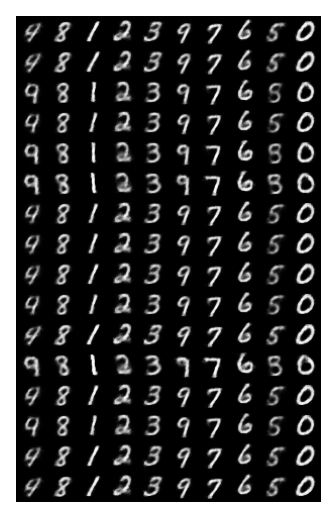

<Figure size 320x320 with 0 Axes>

In [34]:
Train.basicTrainLoop(
    model,
    data_loader,
    test_loader,
    num_epochs=10,
    lrs=[
        5e-2,
        ], 
    wt=1e-3,
    #report_interval=10,
    report_interval=35,
    #do_plot=True,
    #test_accuracy=True,
)
ut.do_plot_helper(model, "cpu")


epoch's lr =  0.01
epoch 0
training phase
rec: 116.1012191772461
loss_z: 10.467874526977539
loss_w: 0.5409873723983765
loss_cluster: -0.8787548542022705
loss_d: 0.2954118251800537
loss_y_alt: 1.7565439939498901
loss_y_alt2: 0
total_loss: 129.1620330810547
num_clusters: 10

done training


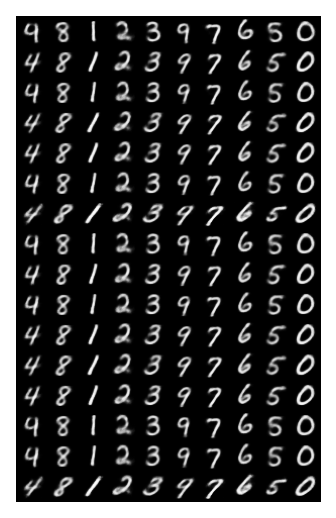

<Figure size 320x320 with 0 Axes>

In [35]:
Train.basicTrainLoop(
    model,
    data_loader,
    test_loader,
    num_epochs=10,
    lrs=[
        1e-2,
        ], 
    wt=1e-3,
    #report_interval=10,
    report_interval=35,
    #do_plot=True,
    #test_accuracy=True,
)
ut.do_plot_helper(model, "cpu")


epoch's lr =  0.0001
epoch 0
training phase
rec: 83.07035827636719
loss_z: 12.798467636108398
loss_w: 0.9078888893127441
loss_cluster: -0.9753220081329346
loss_d: 0.3601876497268677
loss_y_alt: 1.9119586944580078
loss_y_alt2: 0
total_loss: 99.04886627197266
num_clusters: 10

[4. 8. 1. 2. 3. 9. 7. 6. 5. 0.] 
 0.9139529914529915 
 [1.         0.92307692 1.         0.88888889 0.75       1.
 1.         0.875      0.76923077 0.93333333]
0.921875 

epoch 39
training phase
rec: 82.97879028320312
loss_z: 12.838052749633789
loss_w: 0.8871352672576904
loss_cluster: -0.9738401770591736
loss_d: 0.3623741865158081
loss_y_alt: 1.8849377632141113
loss_y_alt2: 0
total_loss: 98.9512939453125
num_clusters: 10

[4. 8. 1. 2. 3. 9. 7. 6. 5. 0.] 
 0.9318546365914788 
 [0.89473684 0.93333333 1.         1.         0.85714286 0.8
 0.83333333 1.         1.         1.        ]
0.921875 

done training


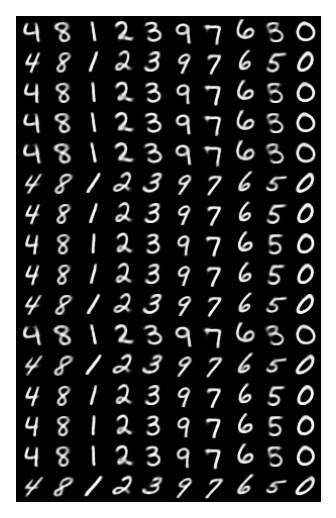

<Figure size 320x320 with 0 Axes>

In [61]:
Train.basicTrainLoop(
    model,
    data_loader,
    test_loader,
    num_epochs=40,
    lrs=[
        #1e-4,
        1e-4,
        ], 
    #wt=1e-4,
    wt=0e-6,
    #report_interval=10,
    report_interval=39,
    #do_plot=True,
    test_accuracy=True,
)
ut.do_plot_helper(model, "cpu")


In [63]:
ut.saveModelParameters(
        model,
        "./results/gmmxz_mnist10_us" + ut.timeStamp() + ut.randomString() + "params.pt",
        method="json",
        )
torch.save(
        model.state_dict(),
        "./results/gmmxz_mnist10_us" + ut.timeStamp() + ut.randomString() + "state.pt",
        )


In [62]:
model.eval()
r,p,s = ut.estimateClusterImpurityLoop(model, test_data, test_labels, "cuda", )
print(p, "\n", r.mean(), "\n", r)
print((r*s).sum() / s.sum())


[4. 8. 1. 2. 3. 9. 7. 6. 5. 0.] 
 0.9303712334826768 
 [0.95015259 0.92476489 0.98584071 0.95930233 0.83925234 0.90881764
 0.95757576 0.96750524 0.86059908 0.94990177]
0.9313


In [65]:
adata = sc.AnnData(X = test_data.flatten(1).detach().numpy())
adata.obs['labels'] = test_labels.argmax(-1).numpy().astype(str)
output = model(test_data, )
adata.obsm["z"] = output["mu_z"].detach().numpy()
adata.obs["pred"] = output["q_y"].detach().argmax(-1).numpy().astype(str)
del output

In [66]:
sc.pp.pca(adata,)
sc.pp.neighbors(adata,)
sc.tl.umap(adata,)
sc.tl.louvain(adata,)

/home/ykolb/miniconda3/envs/torch/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'labels' as categorical
/home/ykolb/miniconda3/envs/torch/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'pred' as categorical


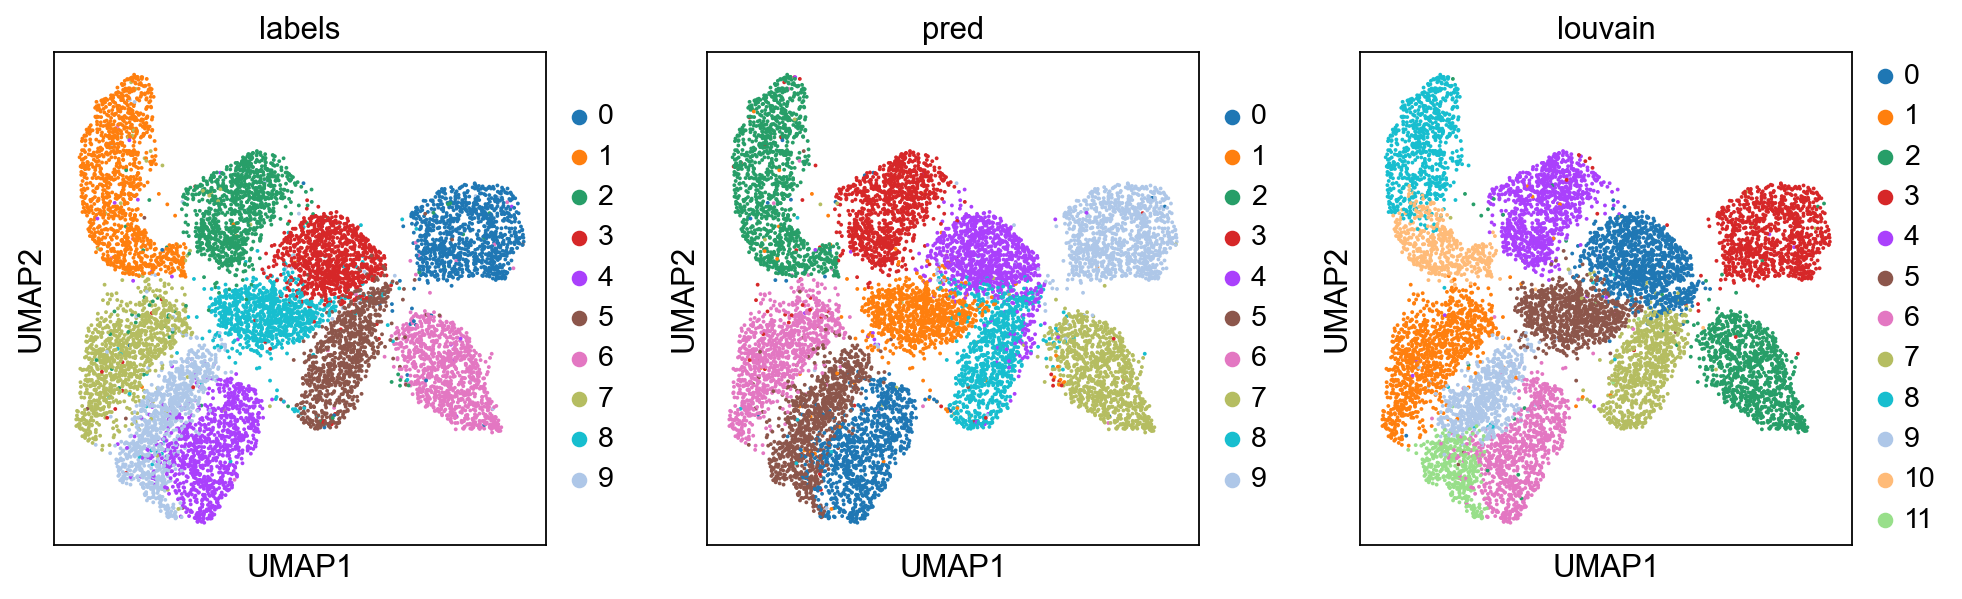

In [67]:
sc.pl.umap(
    adata,
    color=[
        "labels",
        "pred",
        "louvain",
    ],
)

In [68]:
sc.pp.neighbors(adata, use_rep="z",)
sc.tl.umap(adata,)
sc.tl.louvain(adata,)

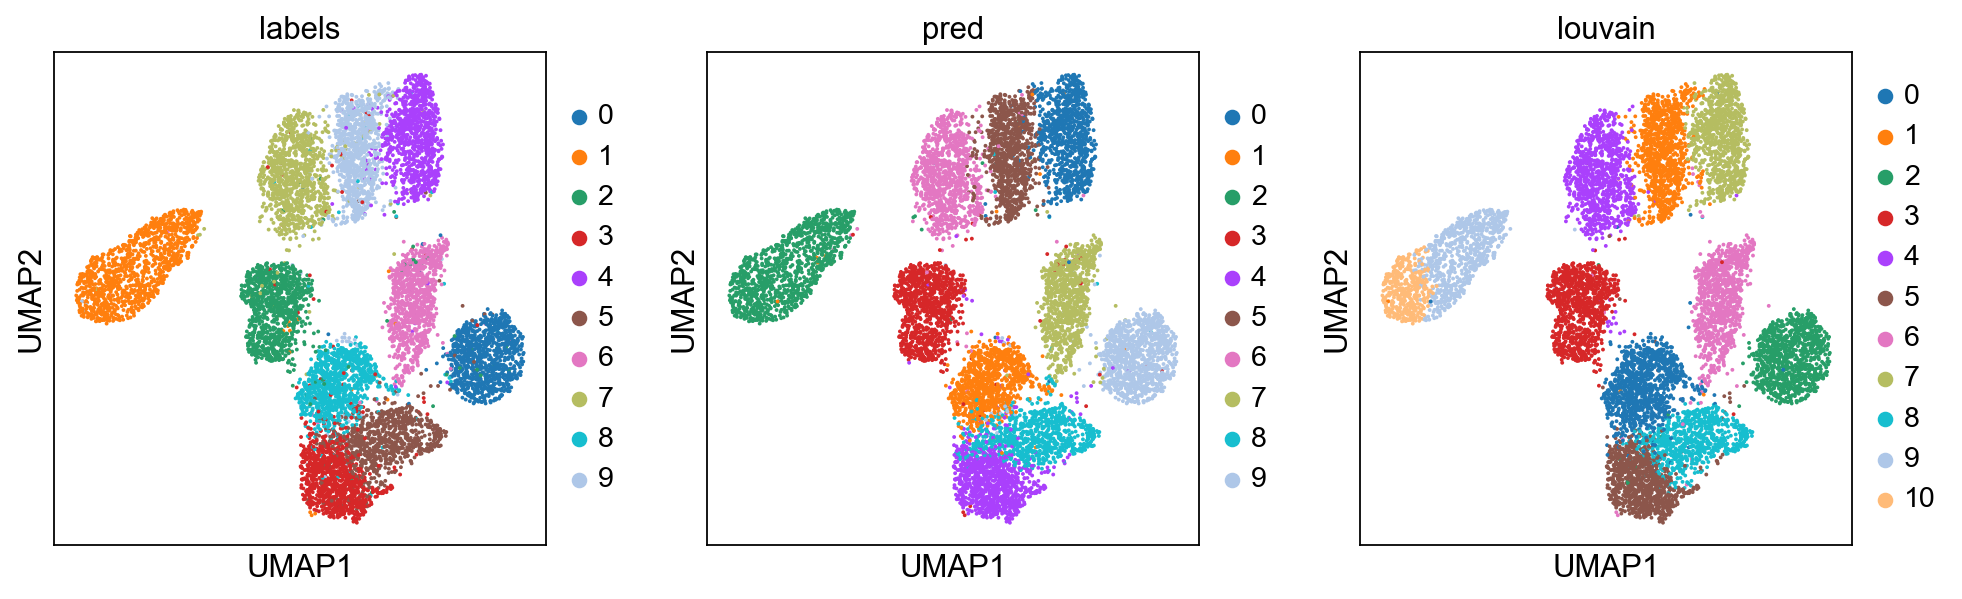

In [69]:
sc.pl.umap(
    adata,
    color=[
        "labels",
        "pred",
        "louvain",
    ],
)